In [1]:
import os
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted


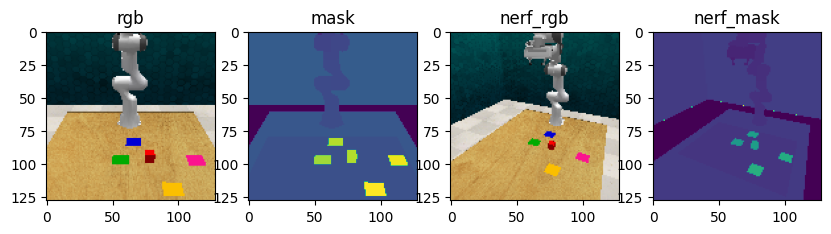

In [4]:
task = 'slide_block_to_color_target'
data_dir  = f'../data/train_data/{task}/all_variations/episodes/'
episode = 'episode1'
episodes = os.listdir(data_dir)

episode_dir = f'{data_dir}/{episode}/'

front_rgb_dir = episode_dir + 'front_rgb/'
front_rgb = natsorted(os.listdir(front_rgb_dir))

front_mask_dir = episode_dir + 'front_mask/'
front_mask = natsorted(os.listdir(front_mask_dir))

nerf_data_dir = episode_dir + 'nerf_data/' 
# num_nerf_data = len(os.listdir(nerf_data_dir))
num_nerf_data = natsorted(os.listdir(nerf_data_dir))

f_rgb = Image.open(front_rgb_dir+front_rgb[3])
f_rgb = np.array(f_rgb)

f_mask = Image.open(front_mask_dir+front_mask[3])
f_mask = np.array(f_mask)[...,0]

nerf_rgb = Image.open(nerf_data_dir+num_nerf_data[3]+'/images/15.png')
nerf_rgb = np.array(nerf_rgb)

nerf_mask = Image.open(nerf_data_dir+num_nerf_data[3]+'/masks/15.png')
nerf_mask = np.array(nerf_mask)[...,0]

fig, ax = plt.subplots(1,4,figsize=(10,7))
ax[0].set_title('rgb')
ax[0].imshow(f_rgb)
ax[1].set_title('mask')
ax[1].imshow(f_mask)
ax[2].set_title('nerf_rgb')
ax[2].imshow(nerf_rgb)
ax[3].set_title('nerf_mask')
ax[3].imshow(nerf_mask)
plt.show()

# f_mask
    

In [3]:
f_mask.shape

(128, 128)

In [268]:
f_mask_value = f_mask.reshape(-1)
set(f_mask_value)

{10, 31, 34, 42, 43, 44, 45, 46, 48, 52, 55, 143, 147, 148, 161, 165}

In [269]:
f_mask = f_mask * 255
f_mask

array([[201, 201, 201, ..., 201, 201, 201],
       [201, 201, 201, ..., 201, 201, 201],
       [201, 201, 201, ..., 201, 201, 201],
       ...,
       [208, 208, 208, ..., 208, 208, 208],
       [208, 208, 208, ..., 208, 208, 208],
       [208, 208, 208, ..., 208, 208, 208]], dtype=uint8)

In [270]:
f_mask_value = f_mask.reshape(-1)
set(f_mask_value)

{91, 95, 108, 109, 113, 201, 204, 208, 210, 211, 212, 213, 214, 222, 225, 246}

In [271]:
mask_value = nerf_mask.reshape(-1)
set(mask_value)
# mask_value

{0,
 10,
 31,
 34,
 35,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 52,
 53,
 55,
 143,
 147,
 148,
 161,
 165,
 255}

[143, 147, 148, 161, 165]
(128, 128, 3)


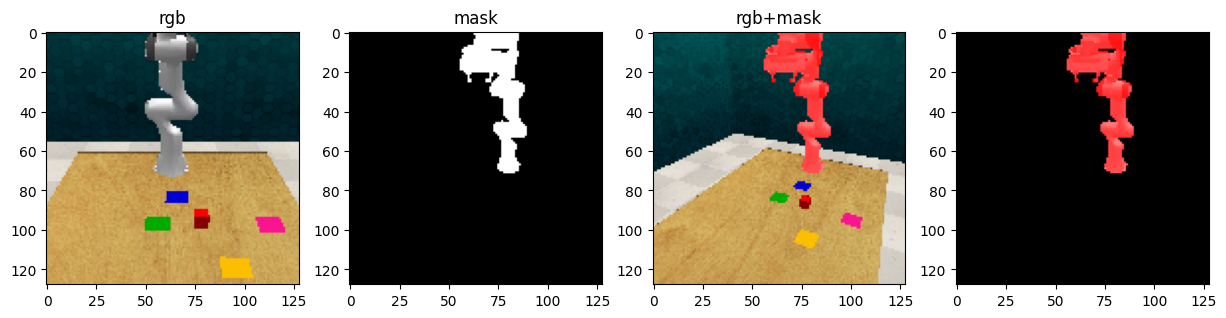

(128, 128, 3)


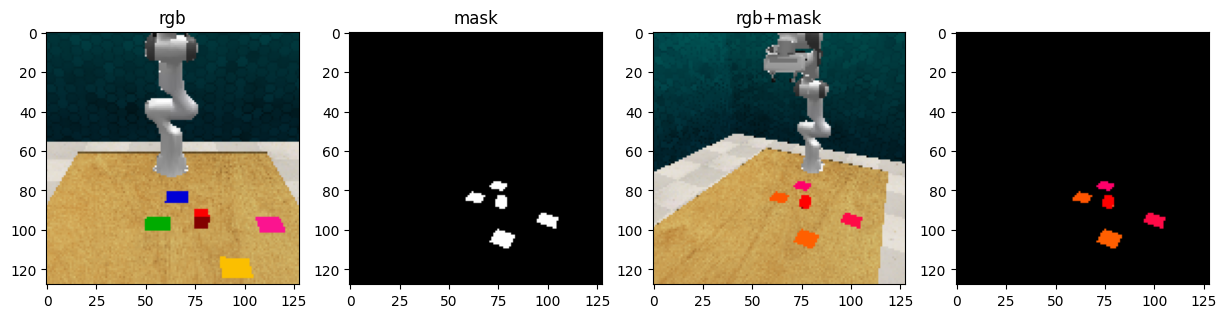

(128, 128, 3)


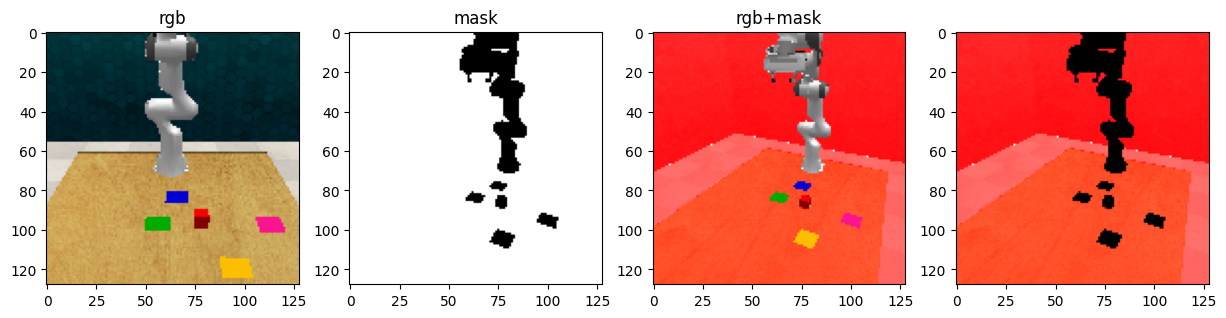

In [272]:
# object_mask = 0 # None
# object_mask = 10 # table
# object_mask = 31 # gripper
# object_mask = 34 # gripper
# object_mask = 35 # arm
# object_mask = 39 # arm
# object_mask = 40 # arm
# object_mask = 41 # arm
# object_mask = 42 # arm
# object_mask = 43 # arm
# object_mask = 44 # arm
# object_mask = 45 # arm
# object_mask = 46 # arm
# object_mask = 48 # table
# object_mask = 52 # table
# object_mask = 55 # bg
# object_mask = 202 # object
# object_mask = 206 # object
# object_mask = 207 # object
# object_mask = 220 # object
# object_mask = 224 # object



Arm = [31,34,35,39,40,41,42,43,44,45,46]
Others = [10,48,52,53,54,55,255]
Object = [item for item in set(mask_value) if item not in Arm + Others]
Object.remove(0)
print(Object)

def display_mask(mask_value):
    total_f_mask = np.zeros([128,128,3])
    for obj in mask_value:
        # f_rgb = Image.open(front_rgb_dir+front_rgb[50])
        # f_rgb = np.array(f_rgb)

        # f_mask = Image.open(front_mask_dir+front_mask[50])
        # f_mask = np.array(f_mask)

        nerf_rgb = Image.open(nerf_data_dir+num_nerf_data[3]+'/images/15.png')
        nerf_rgb = np.array(nerf_rgb)

        nerf_mask = Image.open(nerf_data_dir+num_nerf_data[3]+'/masks/15.png')
        nerf_mask = np.array(nerf_mask)
        
        nerf_mask[nerf_mask!=obj] = 0
        nerf_mask[nerf_mask==obj] = 255
        
        total_f_mask+=nerf_mask
        
    fig, ax = plt.subplots(1,4,figsize=(15,15))
    ax[0].set_title('rgb')
    ax[0].imshow(f_rgb)
    ax[1].set_title('mask')
    ax[1].imshow(total_f_mask[:,:,0], cmap='grey')
    ax[2].set_title('rgb+mask')

    nerf_rgb[:,:,0][total_f_mask[:,:,0]==255] = nerf_rgb[:,:,0][total_f_mask[:,:,0]==255]/2
    nerf_rgb[:,:,1][total_f_mask[:,:,0]==255] = nerf_rgb[:,:,1][total_f_mask[:,:,0]==255]/2
    nerf_rgb[:,:,2][total_f_mask[:,:,0]==255] = nerf_rgb[:,:,2][total_f_mask[:,:,0]==255]/2
    
    

    nerf_rgb[total_f_mask==255] = 255

    ax[2].imshow(nerf_rgb)
    
    
    total_f_mask = np.repeat(total_f_mask[:,:,0:1],3,axis=-1).astype(np.uint8)
    print(total_f_mask.shape)
    
    nerf_rgb[total_f_mask!=255] = 0
    ax[3].imshow(nerf_rgb)
    
    
    plt.show()
    
    # fig, ax = plt.subplots(1,3,figsize=(15,15))
    
display_mask(Arm)
display_mask(Object)
display_mask(Others)


In [273]:
a = np.random.rand(128,128,3)
a[:,:,0:1].shape

(128, 128, 1)

In [274]:
import torch

In [275]:
pcd = torch.randint(0,255,(1,3,4,4))
mask = torch.randint(0,255,(4,4))>125
pcd = pcd.permute(0,2,3,1)
print(pcd.shape)
print('pcd')
print(pcd)
print('mask')
print(mask)
print(mask.shape)
print(pcd[:,mask,:])
print(pcd[:,mask,:].shape)
# print(rgb[:,mask].shape)
# print(np.transpose(rgb,[1,2,0]).shape)
# plt.imshow(np.transpose(rgb,[1,2,0]))

# rgb = rgb[...,None].repeat(1,1,3)
# print(rgb.shape)
# print(rgb)

# mask = mask[...,None].repeat(1,1,3)

# rgb = rgb.reshape(-1,3)
# mask = mask.reshape(-1,3)
# rgb, mask

torch.Size([1, 4, 4, 3])
pcd
tensor([[[[155, 170, 162],
          [ 68, 163,  62],
          [188,  57,   2],
          [ 38, 116, 176]],

         [[202,  36,  12],
          [197, 172, 139],
          [238,  45,   8],
          [113, 181, 247]],

         [[216, 227,  20],
          [102,  89,   3],
          [132,  18,   4],
          [106, 113,  38]],

         [[131, 148,  44],
          [229,  80, 121],
          [  1, 218,  91],
          [135, 233, 164]]]])
mask
tensor([[False,  True,  True,  True],
        [False, False,  True, False],
        [ True, False,  True,  True],
        [ True,  True,  True, False]])
torch.Size([4, 4])
tensor([[[ 68, 163,  62],
         [188,  57,   2],
         [ 38, 116, 176],
         [238,  45,   8],
         [216, 227,  20],
         [132,  18,   4],
         [106, 113,  38],
         [131, 148,  44],
         [229,  80, 121],
         [  1, 218,  91]]])
torch.Size([1, 10, 3])


In [276]:
set(pcd.reshape(-1).tolist())

{1,
 2,
 3,
 4,
 8,
 12,
 18,
 20,
 36,
 38,
 44,
 45,
 57,
 62,
 68,
 80,
 89,
 91,
 102,
 106,
 113,
 116,
 121,
 131,
 132,
 135,
 139,
 148,
 155,
 162,
 163,
 164,
 170,
 172,
 176,
 181,
 188,
 197,
 202,
 216,
 218,
 227,
 229,
 233,
 238,
 247}